<a href="https://colab.research.google.com/github/WaquarH/my-scratch/blob/main/Fred_Quaterly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Regression with pycaret</h1>
<strong>Data Loading and Preparation</strong>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/fred_quarterly.csv')

In [3]:
df.head(20)

,date,month,quarter,Target,gnp,gdpdef,gdp
0,1/1/2000,2000-01,2000Q1,12935.252,10035.263,77.325,10002.179
1,4/1/2000,2000-04,2000Q2,13170.749,10283.391,77.807,10247.720
2,7/1/2000,2000-07,2000Q3,13183.890,10348.645,78.263,10318.165
3,10/1/2000,2000-10,2000Q4,13262.250,10490.430,78.688,10435.744
4,1/1/2001,2001-01,2001Q1,13219.251,10510.297,79.204,10470.231
5,4/1/2001,2001-04,2001Q2,13301.394,10647.427,79.683,10599.000
6,7/1/2001,2001-07,2001Q3,13248.142,10623.039,79.996,10598.020
7,10/1/2001,2001-10,2001Q4,13284.881,10748.408,80.245,10660.465
8,1/1/2002,2002-01,2002Q1,13394.910,10833.143,80.504,10783.500
9,4/1/2002,2002-04,2002Q2,13477.356,10918.384,80.783,10887.460


**Visualizing the data**

In [4]:
import matplotlib.pyplot as plt


(array([12.,  5.,  5., 13., 13.,  9.,  6.,  8.,  6.,  9.]),
 array([12935.252 , 13577.5444, 14219.8368, 14862.1292, 15504.4216,
        16146.714 , 16789.0064, 17431.2988, 18073.5912, 18715.8836,
        19358.176 ]),
 <a list of 10 Patch objects>)

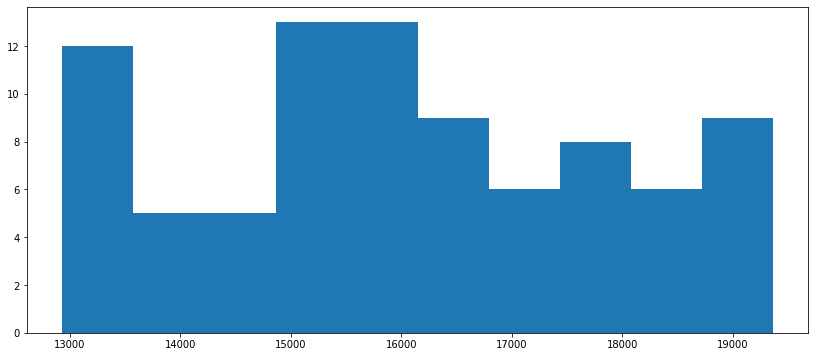

In [5]:
plt.figure(figsize=(14, 6))
plt.hist(df['Target'])

Result:- There is no skewed data. So we don't need to normalise it

<h1><strong>Model Setup</strong></h1>

In [6]:
#installing pycaret
!pip install pycaret

In [7]:
from pycaret.regression import *

**Before initiating setup()**

In [8]:
exp_reg=setup(df,target='Target',categorical_features=['quarter'])

,Description,Value
0,session_id,5060
1,Target,Target
2,Original Data,"(86, 7)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(60, 78)"


In [9]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,1.342476e+02,2.888009e+04,1.589939e+02,9.887000e-01,0.0101,8.600000e-03,0.013
llar,Lasso Least Angle Regression,1.416639e+02,3.125212e+04,1.660043e+02,9.879000e-01,0.0107,9.100000e-03,0.020
lr,Linear Regression,1.398018e+02,4.205758e+04,1.843810e+02,9.850000e-01,0.0117,8.900000e-03,0.273
ridge,Ridge Regression,1.649204e+02,5.292300e+04,2.028776e+02,9.813000e-01,0.0123,1.030000e-02,0.013
br,Bayesian Ridge,1.680465e+02,5.887790e+04,2.088382e+02,9.798000e-01,0.0128,1.050000e-02,0.015
et,Extra Trees Regressor,1.253011e+02,7.973185e+04,1.923389e+02,9.760000e-01,0.0114,7.500000e-03,0.396
knn,K Neighbors Regressor,1.525903e+02,7.674196e+04,2.194042e+02,9.745000e-01,0.0131,9.200000e-03,0.062
rf,Random Forest Regressor,1.750384e+02,1.213679e+05,2.639945e+02,9.593000e-01,0.0156,1.050000e-02,0.413
ada,AdaBoost Regressor,2.168128e+02,1.251763e+05,2.979303e+02,9.542000e-01,0.0177,1.310000e-02,0.073
gbr,Gradient Boosting Regressor,1.857284e+02,1.458843e+05,2.789241e+02,9.535000e-01,0.0164,1.100000e-02,0.046


OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

<br><br>
**Result:-**<br>
Best model :- Orthogonal Matching Pursuit	with least RMSE

In [16]:
#creating omp model
model_omp=create_model('omp')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,87.1630,14474.0657,120.3082,0.9951,0.0083,0.0060
1,172.9743,38176.7692,195.3888,0.9905,0.0115,0.0108
2,175.8408,41148.0810,202.8499,0.9891,0.0145,0.0123
3,75.4707,10368.0429,101.8236,0.9918,0.0065,0.0047
4,88.6473,11895.1777,109.0650,0.9965,0.0077,0.0062
5,90.3674,12125.4126,110.1155,0.9863,0.0071,0.0057
6,123.0040,19993.1556,141.3972,0.9861,0.0091,0.0078
7,119.4656,14633.1513,120.9676,0.9884,0.0076,0.0075
8,240.1952,91666.5016,302.7648,0.9716,0.0173,0.0141
9,169.3480,34320.5680,185.2581,0.9920,0.0118,0.0109


In [10]:
#creating llar model
model= create_model('llar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,95.2336,16048.9748,126.6845,0.9946,0.0087,0.0065
1,180.2192,38139.0924,195.2923,0.9905,0.0121,0.0115
2,208.2394,56484.4948,237.6647,0.9850,0.0171,0.0145
3,100.1501,15451.0628,124.3023,0.9877,0.0078,0.0061
4,104.0269,15496.7931,124.4861,0.9955,0.0090,0.0073
5,100.7325,14632.9758,120.9668,0.9835,0.0077,0.0064
6,122.3092,16945.7296,130.1758,0.9883,0.0084,0.0077
7,100.1927,11258.5271,106.1062,0.9911,0.0065,0.0062
8,229.0087,90804.1428,301.3373,0.9719,0.0172,0.0134
9,176.5269,37259.4563,193.0271,0.9913,0.0128,0.0116


In [17]:
#creating random forest model
model_rf=create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,80.3700,13766.0990,117.3290,0.9953,0.0083,0.0056
1,412.7700,740019.8584,860.2441,0.8164,0.0472,0.0223
2,196.5206,54320.3971,233.0674,0.9856,0.0155,0.0129
3,268.5273,90513.8236,300.8552,0.9282,0.0181,0.0159
4,95.6990,12604.8325,112.2712,0.9963,0.0070,0.0061
5,160.2240,38630.4519,196.5463,0.9563,0.0120,0.0098
6,85.1752,9167.1825,95.7454,0.9936,0.0060,0.0053
7,71.1995,6181.3164,78.6213,0.9951,0.0051,0.0046
8,226.5522,215824.3613,464.5690,0.9332,0.0261,0.0130
9,153.3462,32651.0131,180.6959,0.9923,0.0103,0.0091


**Result:-**<br>
RMSE value decreases

<b><h2>Model Tuning</h2></b>

In [11]:
tuned_model=tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,95.2336,16048.9748,126.6845,0.9946,0.0087,0.0065
1,180.2192,38139.0924,195.2923,0.9905,0.0121,0.0115
2,208.2394,56484.4948,237.6647,0.9850,0.0171,0.0145
3,100.1501,15451.0628,124.3023,0.9877,0.0078,0.0061
4,104.0269,15496.7931,124.4861,0.9955,0.0090,0.0073
5,100.7325,14632.9758,120.9668,0.9835,0.0077,0.0064
6,122.3092,16945.7296,130.1758,0.9883,0.0084,0.0077
7,100.1927,11258.5271,106.1062,0.9911,0.0065,0.0062
8,229.0087,90804.1428,301.3373,0.9719,0.0172,0.0134
9,176.5269,37259.4563,193.0271,0.9913,0.0128,0.0116


In [19]:
#tunig omp model
tuned_model_omp=tune_model(model_omp)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,98.5075,16438.1741,128.2114,0.9944,0.0087,0.0066
1,169.0014,35812.6264,189.2422,0.9911,0.0112,0.0106
2,207.2250,52056.1650,228.1582,0.9862,0.0162,0.0143
3,110.6313,14860.2303,121.9025,0.9882,0.0076,0.0067
4,104.9562,14199.3453,119.1610,0.9958,0.0084,0.0072
5,92.8154,11563.0383,107.5316,0.9869,0.0069,0.0058
6,123.4975,18414.1415,135.6987,0.9872,0.0088,0.0078
7,100.0215,11271.8383,106.1689,0.9911,0.0066,0.0063
8,233.9266,88704.8679,297.8336,0.9726,0.0170,0.0137
9,169.1666,32124.0440,179.2318,0.9925,0.0118,0.0110


In [20]:
#tuning random forest model
tuned_model_rf=tune_model(model_rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,123.3602,19649.2747,140.1759,0.9933,0.0098,0.0085
1,395.1168,694403.5274,833.3088,0.8278,0.0456,0.0214
2,244.4153,78432.5057,280.0580,0.9792,0.0199,0.0169
3,210.2074,61961.6132,248.9209,0.9509,0.0153,0.0126
4,99.1841,12122.9283,110.1042,0.9964,0.0070,0.0064
5,187.1484,46622.1307,215.9216,0.9473,0.0130,0.0114
6,147.8696,24962.1822,157.9942,0.9827,0.0100,0.0093
7,100.6887,15736.7875,125.4464,0.9875,0.0078,0.0064
8,280.4159,238120.4924,487.9759,0.9263,0.0275,0.0164
9,183.1045,39671.9621,199.1782,0.9907,0.0116,0.0110


**RMSE value decereased after tuning**

<b><h1>Model visualization and evaluation</h1></b>

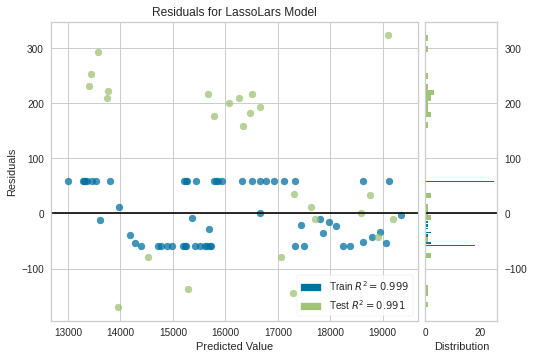

In [12]:
plot_model(tuned_model)

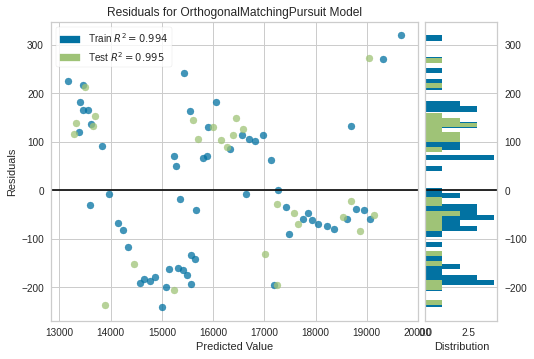

In [21]:
plot_model(tuned_model_omp)

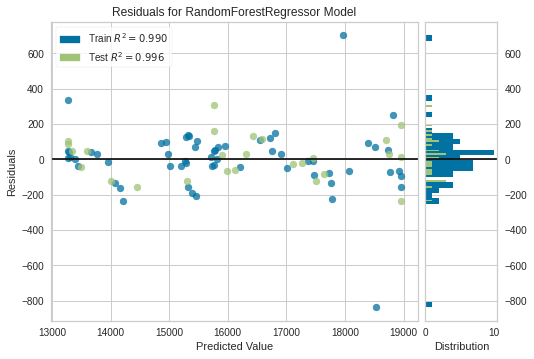

In [22]:
plot_model(tuned_model_rf)

**Random forest is best tuned and showing normalized graph**

In [23]:
evaluate_model(tuned_model_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [24]:
evaluate_model(tuned_model_omp)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [25]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<b><h1>Evaluation and saving</h1></b>

In [26]:
predictions = predict_model(tuned_model_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,94.3975,14112.7875,118.7973,0.996,0.0073,0.0059


In [27]:
predictions = predict_model(tuned_model_omp)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,125.3774,19532.5878,139.759,0.9945,0.0091,0.0081


In [28]:
predictions = predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,147.6923,30442.3366,174.4773,0.9915,0.0115,0.0097


<b>Result:-<br><h3>Best model:- Random Forest </h3></b>

In [29]:
finalize_model(tuned_model_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=11, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.001,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=130, n_jobs=-1, oob_score=False,
                      random_state=5060, verbose=0, warm_start=False)

In [30]:
save_model(tuned_model, 'realestate_rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['quarter'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LassoLars(alpha=1.0, copy_X=True, eps=0.007,
             

<b> - notebook Written By Waquar Haseeb</b>